# Machine learning pro všechny
## Plzeňský Barcamp, 16.4.2016
## Jan Švec, NTIS ZČU v Plzni, <honzas@ntis.zcu.cz>

* Na workshop přijďte, pokud se chcete dozvědět něco o strojovém učení (machine learning). Řekneme se jak natrénovat umělou inteligenci tak, aby za vás dělala automatickou klasifikaci třeba textu, ale i obrazu nebo řeči. A určitě si ukážeme i neuronové sítě a jak na ně.

* Vezměte si sebou svůj notebook, nejlépe s Linuxem. Programovat budeme v Pythonu, jeho znalost je výhodou, ale ne podmínkou. Pokud jdete na Barcamp nalehko (bez notebooku), můžete přijít jen poslouchat a vše si vyzkoušet v klidu doma.


# Machine learning alias strojové učení

* Co je machine learning?
    * Snaha naučit počítač zobecňovat na základě známých vlastností objektů
    * Učení v nejjednodušší podobě
        1. Použijeme **známé objekty**, popíšeme **očekávané výstupy** a natrénujeme **klasifikátor**
        2. Máme **klasifikátor** a nové **neznámé objekty**, chceme pro ně **výstup**
* Co není machine learning?
    * Data-mining - hledání nových vlastností z dat
    * Big-data - mohou ale být (dobrým) zdrojem pro machine learning

![alt text](https://upload.wikimedia.org/wikipedia/commons/f/fe/Kernel_Machine.svg "Machine learning")

* **Objekty** - pole čísel - příznaky
* **Cílová třída** - očekávaný výstup (bílí/černí)
* **Klasifikátor** - o libovolném objektu rozhodne zda je bílý/černý

# Ukázka pro nedočkavé

* Programovací prostředí
    * **Python** - http://python.org
* Machine learning toolkit 
    * **scikit-learn** - http://scikit-learn.org/stable/
* Běhové prostředí
    * **Jupyter notebook** - Python ve webovém prohlížeči


## Instalace jupyter a sklearn

In [1]:
!pip install jupyter
!pip install sklearn --user

Cleaning up...
Cleaning up...


# Digit recognition database

* 8x8 px obrázky ručně psaných číslic
* 10 tříd
* 180 zástupců pro každou třídy
* 1797 příkladů celkem

* Plný příklad: http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
* Tutorial: http://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction


In [2]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore")


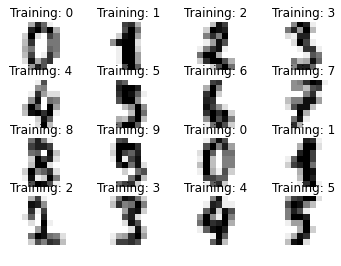

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:16]):
    plt.subplot(4, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)


# Reprezentace objektů

array([[  0.,   0.,   1.,   9.,  15.,  11.,   0.,   0.],
       [  0.,   0.,  11.,  16.,   8.,  14.,   6.,   0.],
       [  0.,   2.,  16.,  10.,   0.,   9.,   9.,   0.],
       [  0.,   1.,  16.,   4.,   0.,   8.,   8.,   0.],
       [  0.,   4.,  16.,   4.,   0.,   8.,   8.,   0.],
       [  0.,   1.,  16.,   5.,   1.,  11.,   3.,   0.],
       [  0.,   0.,  12.,  12.,  10.,  10.,   0.,   0.],
       [  0.,   0.,   1.,  10.,  13.,   3.,   0.,   0.]])

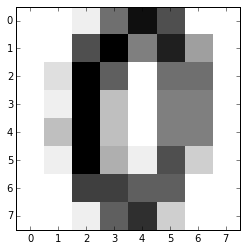

In [4]:
plt.imshow(digits.images[10], cmap=plt.cm.gray_r, interpolation='nearest')
digits.images[10]  # Desátý příklad, matice 8x8

## Více objektů

In [5]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # pole obrázků --> pole vektorů
print(data.shape) # (pocet prikladu, pocet priznaku)

(1797, 64)


In [6]:
data[10]  # Desátý příklad již jako vektor

array([  0.,   0.,   1.,   9.,  15.,  11.,   0.,   0.,   0.,   0.,  11.,
        16.,   8.,  14.,   6.,   0.,   0.,   2.,  16.,  10.,   0.,   9.,
         9.,   0.,   0.,   1.,  16.,   4.,   0.,   8.,   8.,   0.,   0.,
         4.,  16.,   4.,   0.,   8.,   8.,   0.,   0.,   1.,  16.,   5.,
         1.,  11.,   3.,   0.,   0.,   0.,  12.,  12.,  10.,  10.,   0.,
         0.,   0.,   0.,   1.,  10.,  13.,   3.,   0.,   0.])

In [7]:
data  # A celkově matice čísel 1797 x 64

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

# Trénovací a testovací data

* Objekty reprezentovány vektory
* Požadované chování - určení číslice na obrázku (10 číslic --> 10 tříd)
* Jak dobře klasifikujeme? Zkusíme a uvidíme na testovacích datech!

In [8]:
# První polovina dat je pro trénování ...
train_data = data[:n_samples/2]
train_target = digits.target[:n_samples/2] # třídy pro trénování

# ... druhá pro testování
test_data = data[n_samples/2:]
test_target = digits.target[n_samples/2:] # třýdy pro test

In [9]:
train_data[10]  # Příznaky 

array([  0.,   0.,   1.,   9.,  15.,  11.,   0.,   0.,   0.,   0.,  11.,
        16.,   8.,  14.,   6.,   0.,   0.,   2.,  16.,  10.,   0.,   9.,
         9.,   0.,   0.,   1.,  16.,   4.,   0.,   8.,   8.,   0.,   0.,
         4.,  16.,   4.,   0.,   8.,   8.,   0.,   0.,   1.,  16.,   5.,
         1.,  11.,   3.,   0.,   0.,   0.,  12.,  12.,  10.,  10.,   0.,
         0.,   0.,   0.,   1.,  10.,  13.,   3.,   0.,   0.])

In [10]:
train_target[10]  # Cílová třída

0

# 3 kroky ke klasifikátoru

1. Vytvoření instance `classifier = ...()`
2. Natrénování `classifier.fit(X, Y)`
3. Použití `out = classifier.predict(X)`

In [11]:
classifier = svm.SVC(gamma=0.001)  # Vytvoříme si SVM klasifikátor

In [12]:
classifier.fit(train_data, train_target)  # Natrénujeme si ho ...

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
test_predict = classifier.predict(test_data)  # ... a používáme

In [14]:
print(test_target[210:230])  # Co má vyjít ...
print(test_predict[210:230]) # ... a jak to vyšlo

[7 6 3 2 1 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4]
[7 6 3 2 1 5 4 6 3 1 7 9 1 7 6 8 4 3 1 4]


# Jak si vedeme?

* Vybereme si vhodný způsob vyhodnocení
* Přesnost - `metrics.accuracy_score(reference, hypotéza)`
* počet správně predikovaných / počet celkem

In [15]:
metrics.accuracy_score(test_target, test_predict)

0.96885428253615125

In [16]:
100-metrics.accuracy_score(test_target, test_predict)*100.

3.1145717463848825

## Více než 3 ze 100 příkladů chybně
## Je to zanedbatelně nebo příliš?

# Chybová analýza

Reference: 7
Predikce:  5


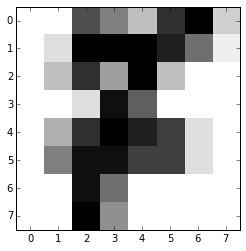

In [17]:
plt.imshow(digits.images[n_samples/2+215], cmap=plt.cm.gray_r, interpolation='nearest')
print('Reference:', test_target[215])
print('Predikce: ', test_predict[215])

# Způsoby učení

## Supervised

* **Trénovací data**
    * Objekty + cílové třídy
* **Predikce**
    * Nový obraz → třída

<center>
<img width="200px" src="supervised.png"> 
</center>

## Semisupervised

* **Trénovací data**
    * Objekty + cílové třídy
    * Objekty - *bez cílové třídy, typicky více než označených dat*
* **Predikce**
    * Nový obraz → třída
    
<center>
<img width="200px" src="semisupervised.png"> 
</center>

    
## Unsupervised

* **Trénovací data**
    * Objekty - *bez cílové třídy, předpokládá se automatické určení tříd*
* **Predikce**
    * Nový obraz → třída - *co znamená?*

<center>
<img width="200px" src="unsupervised.png"> 
</center>

<center>
<img width="200px" src="unsupervised2.png"> 
</center>

# Data
## Středobod ML vesmíru

* *Naměřené příznaky*
    * Autor navrhne od boku *feature-engineering"
* *Obrázky*
    * Použít jak jsou
    * Feature extractory
    * Konvoluční neuronové sítě
* *Text*
    * Vektorizace
    

# Text

## Vektorizace

* Převedení textu na vektor
* Řídké příznaky

In [18]:
lines =  u'''ukázkový text
ukázkový řetězec
text test řetězec text
'''.splitlines()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(lines)
vectorizer.transform(lines).toarray()

array([[0, 1, 1, 0],
       [0, 0, 1, 1],
       [1, 2, 0, 1]])

In [20]:
vectorizer.vocabulary_

{u'test': 0, u'text': 1, u'uk\xe1zkov\xfd': 2, u'\u0159et\u011bzec': 3}

## Počty nebo TF-IDF

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Binární příznakový vektor

In [22]:
vectorizer = CountVectorizer(binary=False)

## Vektorizace znaků

* Podřetězce délky 1 až 3

In [23]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))

## Vektorizace znaků

In [24]:
vectorizer = CountVectorizer(analyzer='char', ngram_range=(1, 3))
vectorizer.fit(lines)
vectorizer.transform(lines).toarray()

array([[1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [3, 2, 2, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 1, 7, 2, 1, 1, 3, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2,
        2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]])

In [25]:
print(' '.join(vectorizer.vocabulary_))

zec t t  t ý t áz vý xt   st  ec  t ř etě  ř vý  kov tě c  ko ový káz  te á ká te c t t uk xt  x z ý t  ý  zk ze  ře ec tex ex et ě tes es zko ře s uká v est ř ý ř c ázk e ěze ěz k těz o st ext u ov řet


# Klasifikace tweetů

## Jak automaticky říci, jestli tweet bude dobrý nebo ne?

## Dobrý tweet

* Podle součtu Favourites a Retweetů padne do 25% nejlepších tweetů uživatele!


In [26]:
!pip install pandas

import pandas as pd
pd.set_option('display.max_rows', 1000)

Cleaning up...


# Načtení tweetů z CSV

In [27]:
TWTS = ['PREZIDENTmluvci']

SUFFIX = '_dump.csv'

datasets = []
for who in TWTS:
    frame = pd.DataFrame.from_csv(who+SUFFIX, encoding='utf-8')
    frame['cnt'] = frame.loc[:, 'fav_cnt'] + frame.loc[:, 'rt_cnt']
    
    best_thr = frame['cnt'].quantile(q=0.75)
    frame['good'] = frame['cnt'] >= best_thr

    frame['who'] = who
    print(who, 'good if cnt >=', best_thr, 'total', len(frame))
    

    datasets.append(frame)
data = pd.concat(datasets)
data['text'].fillna("", inplace=True)

PREZIDENTmluvci good if cnt >= 10.0 total 1145


## Nezbytné importy

In [28]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, f1_score

## Rozdělení na train a test

In [29]:
TEST_SIZE = len(data) // 20
train_data, test_data= train_test_split(data, test_size=TEST_SIZE, random_state=42)

# Vektorizace a příprava data

In [30]:
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1,5), lowercase=False)
vectorizer.fit(train_data['text'].values)

train_X = vectorizer.transform(train_data['text'].values)
train_Y = train_data['good'].values.astype(np.int)

test_X = vectorizer.transform(test_data['text'].values)
test_Y = test_data['good'].values.astype(np.int)

## Natrénování klasifikátoru

In [31]:
clsf = SGDClassifier(loss='modified_huber',
                     alpha=1e-6, n_iter=200,
                     class_weight='balanced',
                     learning_rate='constant', eta0=0.001)
clsf.fit(train_X, train_Y)

SGDClassifier(alpha=1e-06, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='modified_huber', n_iter=200,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

## Vyhodnocení přesnosti na test datech

In [32]:
pred_Y = clsf.predict(test_X)
prob_Y = clsf.predict_proba(test_X)[:, 1]
test_data.loc[:, 'pred'] = pd.Series(index=test_data.index, data=pred_Y.astype(np.bool))
test_data.loc[:, 'score'] = pd.Series(index=test_data.index, data=prob_Y)
print('Acc:', accuracy_score(test_Y, pred_Y))
print('F1: ', f1_score(test_Y, pred_Y))

for who in test_data['who'].unique():
    sel = test_data['who'] == who
    print(who, 'F1: ', f1_score(test_data[sel]['good'], test_data[sel]['pred']))

Acc: 0.684210526316
F1:  0.5
PREZIDENTmluvci F1:  0.5


## Trochu mluvčáčkovi pomůžeme

In [33]:
TWTS = ['PREZIDENTmluvci', 'PavelUngr', 'JaromirBosak', 'zufanek']
        #                  ^^ Umi hledat ^^ Umi mluvit   ^^ C2H5OH
SUFFIX = '_dump.csv'

datasets = []
for who in TWTS:
    frame = pd.DataFrame.from_csv(who+SUFFIX, encoding='utf-8')
    frame['cnt'] = frame.loc[:, 'fav_cnt'] + frame.loc[:, 'rt_cnt']
    
    best_thr = frame['cnt'].quantile(q=0.75)
    frame['good'] = frame['cnt'] >= best_thr

    frame['who'] = who
    print(who, 'good if cnt >=', best_thr, 'total', len(frame))
    

    datasets.append(frame)
data = pd.concat(datasets)
data['text'].fillna("", inplace=True)

PREZIDENTmluvci good if cnt >= 10.0 total 1145
PavelUngr good if cnt >= 5.0 total 3227
JaromirBosak good if cnt >= 22.0 total 3245
zufanek good if cnt >= 3.0 total 3230


In [34]:
TEST_SIZE = len(data) // 20
train_data, test_data= train_test_split(data, test_size=TEST_SIZE, random_state=42)

vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1,5), lowercase=False)
vectorizer.fit(train_data['text'].values)

train_X = vectorizer.transform(train_data['text'].values)
train_Y = train_data['good'].values.astype(np.int)

test_X = vectorizer.transform(test_data['text'].values)
test_Y = test_data['good'].values.astype(np.int)

clsf = SGDClassifier(loss='modified_huber',
                     alpha=1e-6, n_iter=200,
                     class_weight='balanced',
                     learning_rate='constant', eta0=0.001)
clsf.fit(train_X, train_Y)

SGDClassifier(alpha=1e-06, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='modified_huber', n_iter=200,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

In [35]:
pred_Y = clsf.predict(test_X)
prob_Y = clsf.predict_proba(test_X)[:, 1]
test_data.loc[:, 'pred'] = pd.Series(index=test_data.index, data=pred_Y.astype(np.bool))
test_data.loc[:, 'score'] = pd.Series(index=test_data.index, data=prob_Y)
print('Acc:', accuracy_score(test_Y, pred_Y))
print('F1: ', f1_score(test_Y, pred_Y))

for who in test_data['who'].unique():
    sel = test_data['who'] == who
    print(who, 'F1: ', f1_score(test_data[sel]['good'], test_data[sel]['pred']))

Acc: 0.79520295203
F1:  0.666666666667
JaromirBosak F1:  0.733333333333
zufanek F1:  0.652631578947
PREZIDENTmluvci F1:  0.736842105263
PavelUngr F1:  0.6


## Výsledek

In [36]:
test_data

,fav_cnt,rt_cnt,text,cnt,good,who,pred,score
id,,,,,,,,
698143220551778304,46,2,Už byl nejvyšší čas...,48,True,JaromirBosak,False,0.458232
696623677761265664,19,0,"@stary_mrzout @masinko Martin slyší, Martin ro...",19,True,zufanek,False,0.318130
507301936396521472,1,0,"@jedenpes chtěl jsem napsat, že to v principu ...",1,False,JaromirBosak,False,0.072348
662272935772688384,1,0,"@zahn0 drogy, to chce kvalitní otupovací drogy...",1,False,zufanek,False,0.446737
704976022828142593,6,1,"1/2 Prvoinstanční soud v ""Kauze Peroutka"" sled...",7,False,PREZIDENTmluvci,False,0.349489
344859291066449921,1,0,@davidsmehlik metáme od vzteku kotrmelce. Toto...,1,False,zufanek,True,0.579995
648794158539407360,2,0,2 poznatky: 1. Když spouštíte #seoux neplánujt...,2,False,PavelUngr,False,0.298678
24178773011,0,0,@jakub12 jsem pro!,0,False,zufanek,False,0.000000
572089412672233473,21,0,"Aha, Wolfsburg už vede 5:3, tentokráte Dost př...",21,False,JaromirBosak,True,0.614484


# A proč?

In [37]:
!pip install lime
%matplotlib inline
import lime
import lime.lime_text
from lime.lime_text import ScikitClassifier, LimeTextExplainer
explainer = LimeTextExplainer(class_names=['avg', 'good'], split_expression='(?u)\W+',)

c = ScikitClassifier(clsf, vectorizer)

Cleaning up...


# LIME
## Local Interpretable Model-Agnostic Explanations


In [38]:
tid = 668417361368715264
print(test_data.loc[tid, 'text'])
exp = explainer.explain_instance(test_data.loc[tid, 'text'], c.predict_proba, num_features=10)
#exp.show_in_notebook(text=False)

A zde je máme, nebohé "studenty", kteří chtěli 17.11. za asistence ČT a s posvěcením akademiků položit kytičku:


<img width="400px" style="align: center" src="expl.png">

# Jak vybrat klasifikátor?

<img src="http://scikit-learn.org/stable/_static/ml_map.png">

# Neuronové sítě

## Moderní hit a buzzword :-)

* Neskutečně silné modely
* od 70. let 20. století
* Stagnace po tom, co se zjistilo, že perceptron neudokáže XOR
* Boom s růstem výkonu CPU a GPGPU
* *Na všechno stačí 3-vrstvá síť* vs. 

<img src="https://4.bp.blogspot.com/-TMOLlkJBxms/Vt3HQXpE2cI/AAAAAAAAA8E/7X7XRFOY6Xo/s1600/image03.png">

# Architektury

## Feed-forward

## Konvoluční

## Rekurentní

## LSTM (Long-Short Term Memory)

<img src="https://2.bp.blogspot.com/-qiLxaXSfcp8/VAjllBsNOhI/AAAAAAAAAWM/fIPPugiUWfQ/s1600/1XNYvfGqsv.png">

# Frameworky

## Torch

Od Facebooku - http://torch.ch/

## TensorFlow

Od Google - https://www.tensorflow.org/

## Theano + Lasagne

* Python
* http://deeplearning.net/software/theano/
* https://github.com/Lasagne/Lasagne

# Take-away slidy

## Generování textu neuronovou sítí

* Natrénování RNN na znacích, náhodné generování nového textu
* Zvládá text, ale i markup

http://karpathy.github.io/2015/05/21/rnn-effectiveness/

<img src="http://karpathy.github.io/assets/rnn/latex4.jpeg">

# Inceptionism

* Vygenerování obrázku natrénovanou CNN
* https://github.com/jcjohnson/neural-style
* http://ostagram.ru/

<img src="ostagram.png">

# ConvNetJS

* Implementace neuronových sítí v JavaScriptu
* Demo - agent v bludišti
* http://cs.stanford.edu/people/karpathy/convnetjs/demo/rldemo.html

<img src="convnet.png">

# Soutěžení v ML?

## Kaggle.com

### Analýza sentimentu

https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews
    
### Plankton

https://www.kaggle.com/c/datasciencebowl

# Chci vědět více

* **Machine Learning (Coursera)**: https://www.coursera.org/learn/machine-learning

* **Deep Learning (Udacity)**: https://www.udacity.com/course/deep-learning--ud730

* **Studium** - FAV ZČU v Plzni, FIT ČVUT

* **Zaměstnání** - CISCO, Seznam

<img src="http://4.bp.blogspot.com/-zPPnwXn3GJI/Vj-en5uK5AI/AAAAAAAAPSE/RSKCq1QMY5k/s640/thats%2Bit%2Bthats%2Ball%2Bfolks.jpg">